[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02%20Análisis%20Estadístico%20de%20Datos/notebooks/5_MonteCarlo.ipynb)

# 2.12. Introducción - Monte Carlo

---

La simulación Monte Carlo es una de las herramientas más poderosas en la ciencia de datos y la toma de decisiones basada en incertidumbre. 

<font color="blue">Imagínala como una manera de predecir el futuro probando muchas veces distintos escenarios posibles, basándonos en números aleatorios y distribuciones de probabilidad.</font>

**¿Por qué es importante la simulación Monte Carlo?**

Imagina que estás lanzando una moneda, pero no una vez, sino millones de veces para entender realmente qué tan equilibrada es. 

O supón que estás planificando la producción de arroz premium y necesitas saber cuántos kilos debes producir para maximizar ganancias, considerando factores como la demanda, el clima, y el transporte. Aquí entra Monte Carlo, permitiéndote probar diferentes futuros posibles y tomar la mejor decisión con base en los resultados más probables. 

<img src="../imgs/Ciclo_MC.png" alt="Ciclo Monte Carlo" width="600">


---

Existe un amplio espectro de métodos de Monte Carlo, pero todos comparten el rasgo común de que se basan en la generación de números aleatorios para resolver problemas deterministas.

**NOTA: El término Monte-Carlo, hace referencia al casino de Montecarlo, una de las capitales de los juegos de azar; y se utilizó como denominación para estás técnicas por la aleatoriedad inherente que poseen.**

### ¿Dónde se usa la simulación Monte Carlo?

Algunos campos:

<img src="../imgs/MC_Aplicaciones.png" alt="MC_Aplicaciones" width="600">


### ¿Qué es un modelo?

* Varias definiciones posibles...
  * Simplificación de realidades abstractas, permitirnos un mejor entendimiento y descripción de éstos.
  * Una abstracción donde sólo los "ingredientes esenciales" se mantienen, de acuerdo a ciertas preguntas acerca del sistema
  * Representación de un fenómeno matemático o basado en un lenguaje computacional

### Del modelo a la simulación

Una vez que se ha identificado el modelo, uno necesita "programarlo", "ejecutarlo" (muchas veces) y estudiar los resultados

* Comprensión del programa computacional, de algoritmos, estructuras de los datos, análisis de los datos/resultados
* Verificar, validar y evaluar predicciones

### Modelado de espacio/tiempo y evolución del tiempo

Los procesos naturales ocurren en el espacio y evolucionan con el tiempo...

Por ejemplo, la temperatura ambiental es diferente de un lugar a otro y cambia con el tiempo.

* Un coche cambia su posición con respecto al tiempo...
* En ocasiones, uno sólo está interesado en la evolución del tiempo de una cantidad, independiente de su localización *espacial* en una población
* Además, podemos tener procesos estacionarios....

---

En la evolución del tiempo, la duración de un proceso se puede *descomponer* en pequeños intervalos de tiempo $\Delta$T y podríamos describir el estado del **sistema** en cada uno de estos pasos..

$$ t_0 = 0, t_1 = \Delta t, ... ,t_n = n\Delta t... $$

## Números aleatorios en Python
---
En Python el módulo random nos proporciona un rápido generador de números pseudoaleatorios basado en el **[algoritmo Mersenne Twister](https://www.sciencedirect.com/topics/computer-science/mersenne-twister)**; el cual genera números con una distribución casi uniforme y un período grande, haciéndolo adecuado para una amplia gama de aplicaciones. Veamos un pequeño ejemplo.

**import [random](https://docs.python.org/3/library/random.html)** - Este módulo implementa generadores de números pseudoaleatorios para varias distribuciones.

**seed** - El método seed () se utiliza para inicializar el generador de números aleatorios.

El generador de números aleatorios necesita un número para comenzar (un valor inicial), para poder generar un número aleatorio.

**<font color=red>Nota: De forma predeterminada, el generador de números aleatorios utiliza la hora actual del sistema.</font>**

In [1]:
# Utilizando random para genera números aleatorios.
import random

random.seed(1984) # semilla para replicar la aleatoriedad
random.random() # primer llamado a random

0.36352835585530807

## Estimación Monte Carlo de Pi

Supón que queremos calcular el valor de π sin usar geometría avanzada. Una forma de hacerlo es imaginar un cuadrado y un círculo inscritos dentro de él. Si lanzamos puntos aleatorios en el cuadrado, la proporción de los puntos que caen dentro del círculo con respecto al total nos da una aproximación de π.

Valor aproximado de π: 3.14
Error relativo: 0.0507%


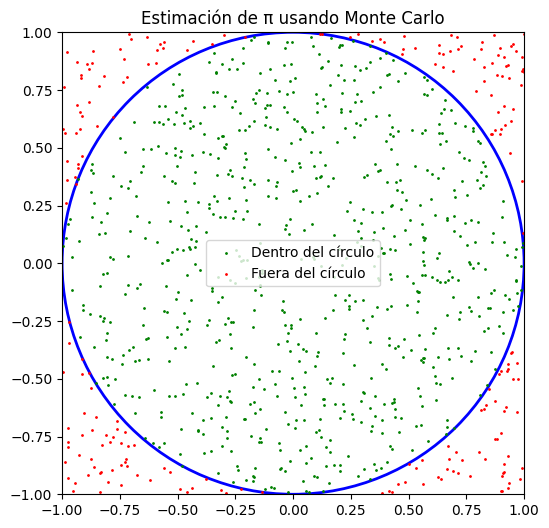

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Número de puntos a generar
num_puntos = 1000

# Generar coordenadas aleatorias (x, y) en un cuadrado de lado 2 (-1 a 1)
x = np.random.uniform(-1, 1, num_puntos)
y = np.random.uniform(-1, 1, num_puntos)

# Calcular distancia al origen
distancia = np.sqrt(x**2 + y**2)

# Contar cuántos puntos caen dentro del círculo de radio 1
puntos_en_circulo = distancia <= 1

# Aproximación de π usando la proporción de puntos dentro del círculo
pi_aproximado = (np.sum(puntos_en_circulo) / num_puntos) * 4

# Mostrar resultado
print(f"Valor aproximado de π: {pi_aproximado}")
# Error relativo respecto al valor real de π
error = abs(np.pi - pi_aproximado) / np.pi * 100

# Mostrar el error
print(f"Error relativo: {error:.4f}%")

# Graficar los puntos
fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal')
ax.set_title('Estimación de π usando Monte Carlo')

# Dibujar círculo y cuadrado
circle = plt.Circle((0, 0), 1, color='blue', fill=False, linewidth=2)
ax.add_patch(circle)
ax.scatter(x[puntos_en_circulo], y[puntos_en_circulo], color='green', s=1, label="Dentro del círculo")
ax.scatter(x[~puntos_en_circulo], y[~puntos_en_circulo], color='red', s=1, label="Fuera del círculo")

# Ajustar ejes
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.legend()
plt.show()


---
---

## <font color="red">Ejemplo práctico</font>

Para este ejemplo, intentaremos predecir cuánto dinero deberíamos tener de presupuesto para dar comisiones de ventas para el próximo año. Este problema es útil para modelar porque tenemos una fórmula definida para calcular las comisiones y probablemente tengamos alguna experiencia con los pagos de comisiones de años anteriores.

Este problema también es importante desde una perspectiva **empresarial**. Las comisiones de venta pueden ser un gran gasto de venta y es importante planificar adecuadamente este gasto. 

---

Además, el uso de una simulación de Monte Carlo es una mejora relativamente simple que puede realizarse para aumentar lo que normalmente es un proceso de estimación poco sofisticado.

En este ejemplo, la comisión de ventas de muestra se vería así para una fuerza de ventas de 5 personas:

![img](https://pbpython.com/images/Excel_Table_1.png)

En este ejemplo, la comisión es el resultado de esta fórmula:

$ Monto de la comisión = Ventas reales * Tasa de comisión $

La tasa de comisión se basa en esta tabla de Porcentaje para planificar:

![img](https://pbpython.com/images/Excel_Table_4.png)

Antes de construir un modelo y ejecutar la simulación, veamos un enfoque simple para predecir el gasto de comisión del próximo año.

### Enfoque ingenuo del problema

Imagine que su tarea como analista es decirle a los de finanzas cuánto presupuestar para las comisiones de ventas para el próximo año. Un enfoque podría ser asumir que todos obtienen el 100% de su objetivo y ganan la tasa de comisión del 4%. Conectar estos valores en Excel produce esto:

![img](https://pbpython.com/images/Excel_Table_2.png)

Imagínemos que presenta esto al de finanzas y ellos dicen: *Nunca todos obtienen la misma tasa de comisión. Necesitamos un modelo más preciso*.

Para la segunda ronda, puede probar un par de rangos:

![img](https://pbpython.com/images/Excel_Table_6.png)

Ahora, **tenemos** un poco más de información y volvemos con el experto... Esta vez dicen: "*este rango es útil, pero ¿cuál es su confianza en este rango? Además, necesitamos que haga esto para una fuerza de ventas de 500 personas y modele varias tarifas diferentes para determinar la cantidad a presupuestar*". Hmmm ... Ahora, ¿qué haces?

----

Este enfoque simple ilustra el método iterativo básico para una simulación de Monte Carlo. Repite este proceso muchas veces para determinar un rango de posibles valores de comisión para el año. Hacer esto manualmente ... es un desafío. Afortunadamente, Python simplifica mucho este enfoque.

# 2.13. Monte Carlo Estacionario

---

### Estimación de Comisiones con Simulación Monte Carlo
Al ejecutar múltiples escenarios con datos aleatorios, podemos obtener una distribución de posibles resultados y estimar la probabilidad de que el gasto se mantenga dentro de un rango determinado.

---

### ¿Por qué usar Monte Carlo en la estimación de comisiones?
- Permite evaluar el riesgo de exceder o quedarse corto en el presupuesto.
- No busca un número exacto, sino un rango de valores probables.
- Se basa en datos históricos para mejorar la precisión del modelo.

---

### Componentes clave de la simulación
1. **Ecuación a evaluar:** Se parte de la fórmula para calcular las comisiones.
2. **Variables aleatorias:** En lugar de elegir valores entre 0% y 200%, utilizamos datos históricos de tasas de comisión para una estimación más precisa.

---

### Beneficios del análisis
- Permite visualizar la distribución de los montos de comisión.
- Ayuda a comprender mejor la incertidumbre y los posibles escenarios.
- Facilita la toma de decisiones informadas sobre el presupuesto.

Al ejecutar cientos o miles de simulaciones, obtenemos una distribución detallada de los posibles montos de comisión, lo que permite una planificación financiera más robusta y realista.

Hay otro valor que debemos simular y es el objetivo de ventas real. Para ilustrar una distribución diferente, asumiremos que nuestra distribución objetivo de ventas se parece a esto:


![img](../imgs/Datos_distribuciones.png)

### Construyendo el modelo... en Python

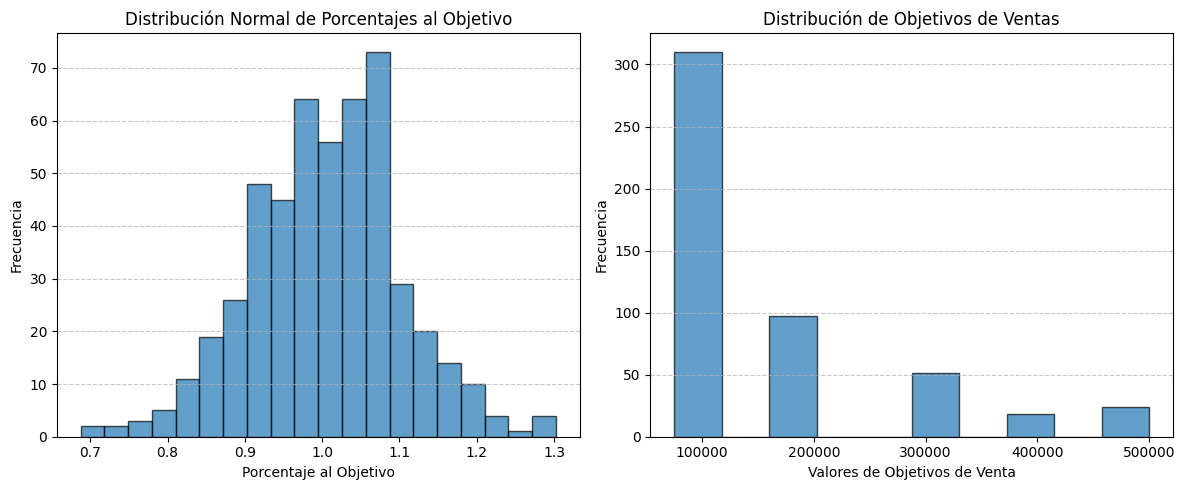

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuración de la simulación Monte Carlo
media = 1  # Valor promedio de porcentaje al objetivo
desviacion_estandar = 0.1  # Variabilidad de los valores
num_repeticiones = 500  # Número de valores generados en cada simulación
num_simulaciones = 1000  # Número total de simulaciones a ejecutar

# Generar valores aleatorios con distribución normal
pct_al_objetivo = np.random.normal(media, desviacion_estandar, num_repeticiones).round(4)

# Configuración de la distribución de objetivos de ventas
sales_target_values = [75000, 100000, 200000, 300000, 400000, 500000]
sales_target_prob = [0.3, 0.3, 0.2, 0.1, 0.05, 0.05]

# Generar valores aleatorios de objetivos de ventas con probabilidades dadas
sales_target = np.random.choice(sales_target_values, num_repeticiones, p=sales_target_prob)

# Crear figura con dos gráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de la distribución normal de porcentajes al objetivo
axes[0].hist(pct_al_objetivo, bins=20, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Porcentaje al Objetivo')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución Normal de Porcentajes al Objetivo')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Histograma de los objetivos de ventas
axes[1].hist(sales_target, bins=10, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Valores de Objetivos de Venta')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de Objetivos de Ventas')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el layout y mostrar la gráfica
plt.tight_layout()
plt.show()


In [4]:
df = pd.DataFrame(index=range(num_repeticiones), 
                  data={'Pct_To_Target': pct_al_objetivo,
                        'Sales_Target': sales_target})

df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
df.head()

,Pct_To_Target,Sales_Target,Sales
0,1.0141,200000,202820.0
1,1.0600,75000,79500.0
2,0.9435,100000,94350.0
3,1.0058,500000,502900.0
4,1.0629,100000,106290.0


La última pieza de código que necesitamos crear es una forma de asignar nuestro Pct_To_Target a la tasa de comisión. Aquí está la función:

In [5]:
def calc_commission_rate(x):
    """ Con base a la tabla de comisiones:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

El beneficio adicional de usar Python en lugar de Excel es que podemos crear una lógica mucho más compleja que es más fácil de entender que si intentáramos construir una declaración if anidada compleja en Excel.

Ahora creamos nuestra tasa de comisión y la multiplicamos por las ventas:

In [6]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
df.head()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
0,1.0141,200000,202820.0,0.04,8112.8
1,1.0600,75000,79500.0,0.04,3180.0
2,0.9435,100000,94350.0,0.03,2830.5
3,1.0058,500000,502900.0,0.04,20116.0
4,1.0629,100000,106290.0,0.04,4251.6


### Hagamos más repeticiones...

In [7]:
# Definamos una lista para guardar resultados de cada simulación para analizar posteriormente
all_stats = []
# Podemos fijar el número de iteraciones...
for i in range(num_simulaciones):

    sales_target = np.random.choice(sales_target_values, num_repeticiones, p=sales_target_prob)
    pct_to_target = np.random.normal(media, desviacion_estandar, num_repeticiones).round(2)

    df = pd.DataFrame(index=range(num_repeticiones), data={'Pct_To_Target': pct_al_objetivo,
                                                   'Sales_Target': sales_target})

    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])

results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Commission_Amount',
                                                           'Sales_Target'])
results_df.describe().round(2).style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"84,095,956.74","2,943,990.25","83,668,750.0"
std,"2,724,787.36","98,756.02","2,693,918.27"
min,"76,086,810.0","2,657,843.0","75,625,000.0"
25%,"82,298,332.0","2,879,299.0","81,950,000.0"
50%,"84,030,792.0","2,941,847.5","83,600,000.0"
75%,"85,936,749.0","3,006,885.75","85,500,000.0"
max,"93,343,170.0","3,278,576.0","93,125,000.0"


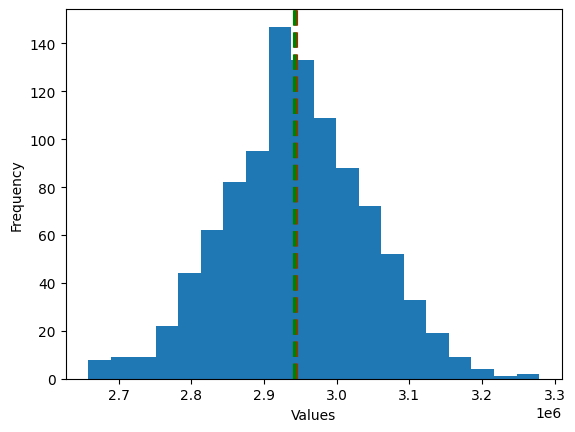

In [8]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(results_df['Commission_Amount'], 20)
plt.axvline(results_df['Commission_Amount'].mean(), color='red', linestyle='dashed', linewidth=3)
plt.axvline(results_df['Commission_Amount'].median(), color='green', linestyle='dashed', linewidth=3)

plt.ylabel('Frequency')
plt.xlabel('Values')
plt.show()

Aquí radica uno de los beneficios de la simulación de Monte Carlo. 

Desarrolla una mejor comprensión de la distribución de resultados probables y puede utilizar ese conocimiento para hacer una estimación informada.

El otro valor de este modelo es que puede modelar muchas suposiciones diferentes y ver qué sucede.

# Reto !

A continuación, se muestran algunos cambios simples que puede realizar para ver cómo cambian los resultados:

  *  Aumente la tasa de comisión máxima al 5%
  *  Disminuir el número de vendedores.
  *  Cambiar la desviación estándar esperada a una cantidad mayor
  *  Modificar la distribución de objetivos



### Nota importante

* Una simulación de Monte Carlo es una herramienta útil para predecir resultados futuros al calcular una fórmula varias veces con diferentes entradas aleatorias. 

* Usar numpy y pandas para construir un modelo y generar múltiples resultados potenciales y analizarlos es relativamente sencillo. El otro beneficio adicional es que los analistas pueden ejecutar muchos escenarios cambiando las entradas y pueden pasar a modelos mucho más sofisticados en el futuro si surgen las necesidades. Finalmente, los resultados se pueden compartir con usuarios no técnicos y facilitar las discusiones en torno a la incertidumbre de los resultados finales.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_h12 = pd.read_csv('https://raw.githubusercontent.com/DCDPUAEM/DCDP/refs/heads/main/02%20An%C3%A1lisis%20Estad%C3%ADstico%20de%20Datos/data/h_12.csv', sep=";")  
df_h12

,Element,Unit,Sample,S,RSD,U
0,Ca,mg/L,3598.922273,NaN,40,NaN
1,Mg,mg/L,1056.487091,NaN,40,NaN
2,Na,mg/L,1680.129729,NaN,40,NaN
3,K,mg/L,249.094420,NaN,40,NaN
4,SO4,mg/L,2896.603374,NaN,40,NaN
5,Cl,mg/L,3509.984386,NaN,40,NaN
6,HCO3,mg/L,1473.160525,NaN,40,NaN
7,CO3,mg/L,4876.165141,NaN,40,NaN


In [10]:
# Now perform the division operation
df_h12['S_Calc'] = (df_h12['Sample'] * df_h12['RSD']) / 100
df_h12.head()

,Element,Unit,Sample,S,RSD,U,S_Calc
0,Ca,mg/L,3598.922273,NaN,40,NaN,1439.568909
1,Mg,mg/L,1056.487091,NaN,40,NaN,422.594836
2,Na,mg/L,1680.129729,NaN,40,NaN,672.051892
3,K,mg/L,249.094420,NaN,40,NaN,99.637768
4,SO4,mg/L,2896.603374,NaN,40,NaN,1158.641350


In [11]:
# Función para generar distribuciones normales y graficarlas en una cuadrícula de 2x4
def PosNormal(df, mean_Head, std_Head, repetitions):
    """
    Genera distribuciones normales para múltiples elementos con media y desviación estándar definidas en un DataFrame.

    Parámetros:
    - df: DataFrame con las medias y desviaciones estándar de cada elemento.
    - mean_Head: Nombre de la columna en df que contiene las medias.
    - std_Head: Nombre de la columna en df que contiene las desviaciones estándar.
    - repetitions: Número de valores a generar para cada elemento.

    Retorna:
    - Un DataFrame con las distribuciones generadas para cada elemento.
    """
    test = pd.DataFrame()
    
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # Crear una cuadrícula de 2x4 para las gráficas
    axes = axes.flatten()  # Asegurar acceso individual a cada subplot
    
    for k in range(8):  # Iterar sobre los 8 elementos
        valores = np.array([])  # Inicializar arreglo para los valores generados
        
        for i in range(11):  # Iterar sobre 11 ciclos de generación
            np.random.seed(i + (11 * k))  # Generar semilla dependiente de k e i
            mu = df.loc[k, mean_Head]  # Obtener la media del elemento
            sigma = df.loc[k, std_Head]  # Obtener la desviación estándar del elemento
            
            # Generar datos aleatorios con distribución normal asegurando valores positivos
            nuevos_valores = np.abs(np.random.normal(mu, sigma, repetitions))

            # Concatenar nuevos valores a la lista de valores generados
            valores = np.concatenate((valores, nuevos_valores), axis=0)

        # Agregar los valores generados al DataFrame
        test[f"Element{k}"] = valores

        # Mostrar estadísticas
        print(f"Element {k}")
        print(f"Tamaño: {valores.size}, Min: {valores.min():.2f}, Max: {valores.max():.2f}")
        print(f"Media: {valores.mean():.2f}, Desviación Estándar: {valores.std():.2f}")
        print(f"Coef. de Variación: {valores.std()/valores.mean()*100:.2f}%\n")

        # Graficar la distribución con histograma y curva normal teórica en la cuadrícula
        ax = axes[k]
        ax.hist(valores, bins=50, density=True, alpha=0.6, edgecolor='black', label="Histograma")
        
        # Curva de la distribución normal teórica
        x = np.linspace(valores.min(), valores.max(), 100)
        y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(- (x - mu)**2 / (2 * sigma**2))
        ax.plot(x, y, linewidth=2, color='r', label="Distribución Normal Teórica")

        ax.set_xlabel("Valor")
        ax.set_ylabel("Densidad de Probabilidad")
        ax.set_title(f"Distribución de Element {k}")
        ax.legend()
        ax.grid(alpha=0.3)

    plt.tight_layout()  # Ajustar la disposición de las gráficas
    plt.show()

    return test

Element 0
Tamaño: 2200, Min: 19.03, Max: 9513.67
Media: 3643.09, Desviación Estándar: 1427.03
Coef. de Variación: 39.17%

Element 1
Tamaño: 2200, Min: 5.07, Max: 2470.13
Media: 1048.75, Desviación Estándar: 415.14
Coef. de Variación: 39.58%

Element 2
Tamaño: 2200, Min: 4.19, Max: 4366.05
Media: 1694.00, Desviación Estándar: 672.42
Coef. de Variación: 39.69%

Element 3
Tamaño: 2200, Min: 0.70, Max: 591.59
Media: 250.71, Desviación Estándar: 100.66
Coef. de Variación: 40.15%

Element 4
Tamaño: 2200, Min: 41.34, Max: 6736.43
Media: 2893.57, Desviación Estándar: 1149.72
Coef. de Variación: 39.73%

Element 5
Tamaño: 2200, Min: 17.71, Max: 10231.42
Media: 3474.03, Desviación Estándar: 1403.71
Coef. de Variación: 40.41%

Element 6
Tamaño: 2200, Min: 1.45, Max: 3424.23
Media: 1487.66, Desviación Estándar: 577.37
Coef. de Variación: 38.81%

Element 7
Tamaño: 2200, Min: 24.20, Max: 12744.94
Media: 4886.73, Desviación Estándar: 1949.68
Coef. de Variación: 39.90%



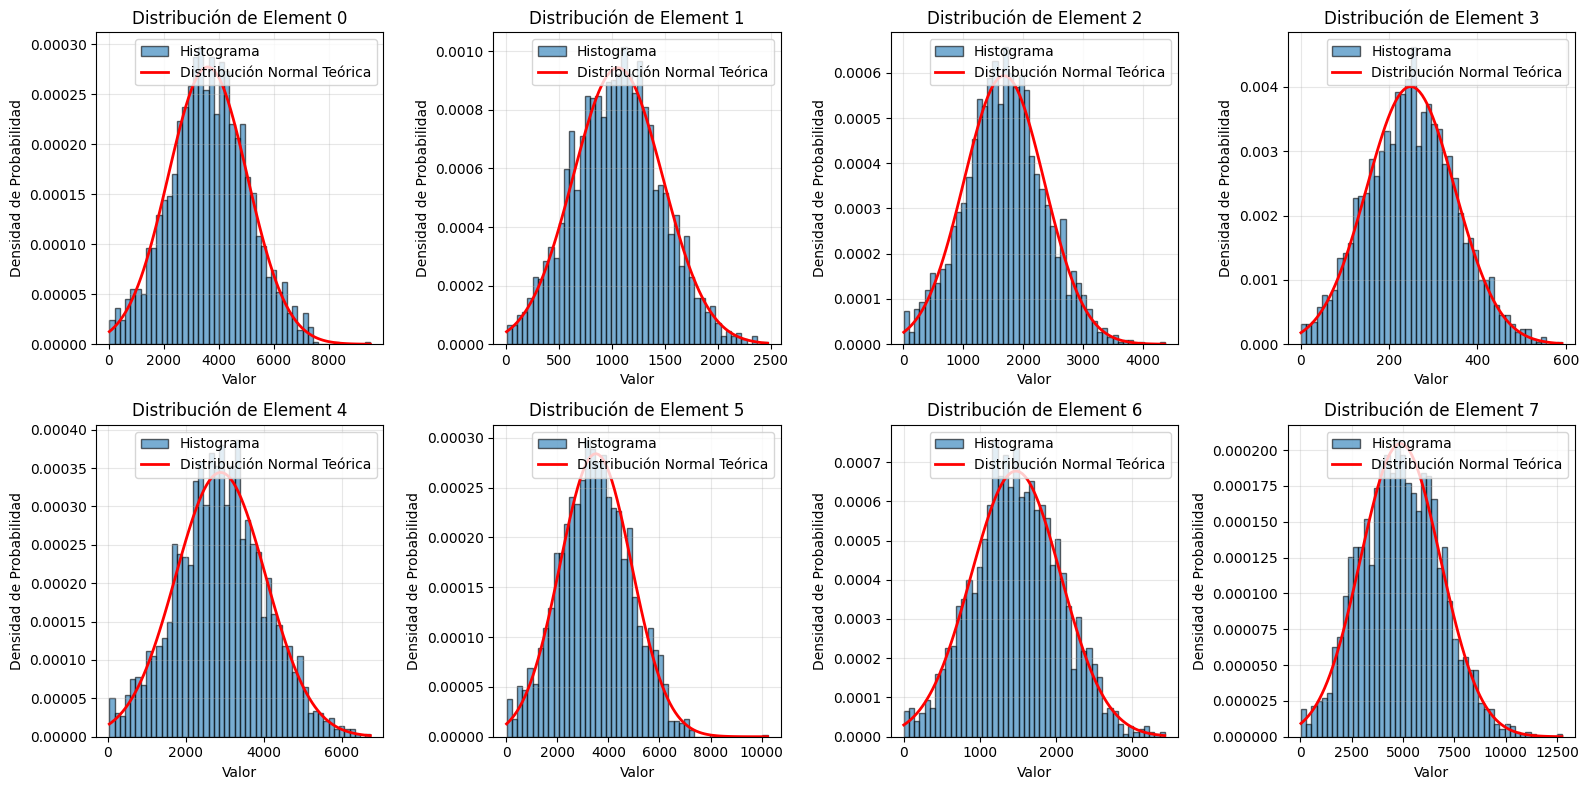

In [12]:
test = PosNormal(df_h12, 'Sample', 'S_Calc', 200)

In [13]:
test.describe()

,Element0,Element1,Element2,Element3,Element4,Element5,Element6,Element7
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,3643.093480,1048.748024,1694.003742,250.709925,2893.565172,3474.028568,1487.658113,4886.726384
std,1427.352060,415.239239,672.573206,100.687277,1149.980203,1404.028030,577.506191,1950.123611
min,19.030163,5.069252,4.187096,0.701362,41.342941,17.713815,1.449677,24.195032
25%,2685.652998,759.189190,1255.681451,180.891674,2142.948341,2502.150918,1106.921287,3509.341845
50%,3634.217471,1052.769457,1689.634231,249.885286,2870.690463,3452.127973,1471.874448,4846.899603
75%,4602.370673,1318.628026,2118.682370,318.545706,3644.703657,4430.746827,1873.269257,6244.704142
max,9513.668432,2470.133333,4366.054092,591.594161,6736.428105,10231.415313,3424.231580,12744.940454


### Monte carlo - resultados de apuestas

Monte Carlo se utiliza a menudo para evaluar el riesgo de una estrategia comercial determinada, por ejemplo, con opciones o acciones. En realidad, solo se cumplirá una de las posibilidades de resultado, pero, en términos de evaluación de riesgos, cualquiera de las posibilidades podría haber ocurrido.

---
Los simuladores de Montecarlo pueden ayudar a aclarar que el éxito y el resultado no son la única medida de si una elección fue buena o no. 

Las opciones no deben evaluarse después de su resultado. En cambio, los riesgos y beneficios solo deben considerarse en el momento en que se tomó la decisión, sin sesgos retrospectivos. Un simulador de monte carlo puede ayudar a visualizar la mayoría o todos los resultados potenciales para tener una idea mucho mejor sobre el riesgo de una decisión.

---

Con eso, consideremos un ejemplo básico de un escenario de juego, donde un usuario puede *lanzar* dados metafóricos para obtener un resultado de 1 a 100.

* Condiciones: Si el usuario saca algo del 1 al 50, la *casa* gana.
* Si el usuario obtiene un resultado entre 51 y 99, el "usuario" gana.
* Si el usuario saca un 100, pierde.

---

Con esto, la casa mantiene una ventaja del 1%, que es mucho menor que la ventaja típica de la casa, así como la ventaja del mercado cuando se incorporan los costos de negociación.

---

Monte Carlo también puede ayudar a ilustrar los defectos de la [falacia del jugador](https://psicologiaymente.com/psicologia/falacia-del-jugador). Muchos jugadores, y en ocasiones especialmente los jugadores que entienden las estadísticas, son víctimas de la falacia del jugador.

La falacia afirma que:

* **tomando algo como lanzar una moneda por cara o cruz, tiene una probabilidad conocida de 50/50. Dicho esto, si caen cara cinco veces seguidas, de alguna manera es más probable que caiga cruz a continuación.**

No importa cuántas caras hayan precedido, sus probabilidades, cada vez que lanza la moneda, son 50/50. Es fácil caer en la trampa de pensar que, en una escala a largo plazo, las probabilidades se correlacionarán con 50/50, por lo tanto, si las probabilidades están desequilibradas actualmente, las probabilidades del próximo lanzamiento tampoco son 50/50.

De nuevo, con nuestro ejemplo en mente, 1-50, la casa gana. 51-99 usuarios ganan. Un 100 perfecto significa que la casa gana.

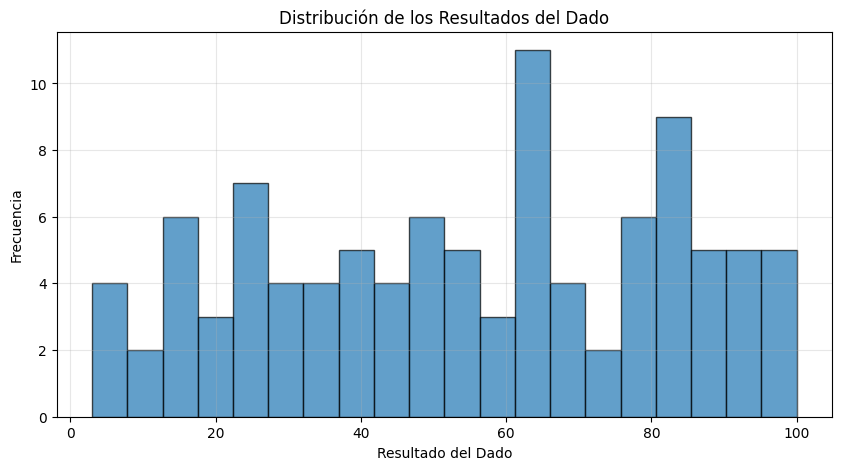

In [14]:
import random
import pandas as pd
import matplotlib.pyplot as plt

# Función para lanzar un dado del 1 al 100
def rollDice():
    return random.randint(1, 100)

# Lanzar el dado 100 veces y almacenar los resultados
results = [rollDice() for _ in range(100)]

# Graficar el histograma de los resultados
plt.figure(figsize=(10, 5))
plt.hist(results, bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Resultado del Dado")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Resultados del Dado")
plt.grid(alpha=0.3)
plt.show()


### Creando un Apostador Básico con Monte Carlo

Ahora vamos a construir un apostador básico, que simplemente apostará la misma cantidad en cada ronda. Esto nos permitirá analizar cómo el azar y la probabilidad afectan los fondos del jugador a lo largo del tiempo.

Además, podremos implementar estrategias más avanzadas como:

 -  Martingala (doblar la apuesta tras perder).
 -  Paroli (doblar la apuesta tras ganar).

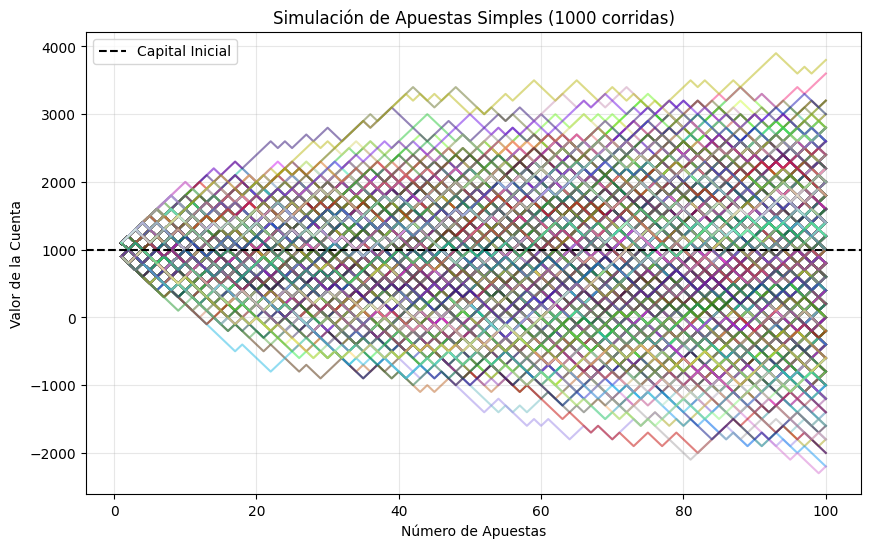

Resultados por encima del capital inicial (390 simulaciones): 39.0%
Resultados por debajo del capital inicial (523 simulaciones): 52.3%
Resultados iguales al capital inicial      (87 simulaciones): 8.7%


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Función para simular una tirada de dados (49% de probabilidad de ganar)
def rollDice():
    return np.random.rand() < 0.49

# Función mejorada para simulación de apuestas simples con conteo detallado de resultados
def simple_bettor_results(funds, initial_wager, wager_count, num_simulations=100):
    """
    Simula una estrategia de apuestas simple donde el jugador apuesta la misma cantidad en cada ronda.
    Se imprimen los valores finales de las simulaciones divididos en:
    - Por debajo del capital inicial
    - Iguales al capital inicial
    - Por encima del capital inicial

    Parámetros:
    - funds: Capital inicial del apostador.
    - initial_wager: Monto de cada apuesta.
    - wager_count: Número total de apuestas.
    - num_simulations: Número de simulaciones a ejecutar (por defecto 100).

    Retorna:
    - No retorna valores, pero genera un gráfico con las trayectorias de cada simulación.
    """
    plt.figure(figsize=(10, 6))
    
    valores_finales = []  # Lista para almacenar el valor final de cada simulación

    for _ in range(num_simulations):
        value = funds  # Fondos actuales del apostador
        vY = []  # Valores de la cuenta después de cada apuesta

        # Generar un color aleatorio en cada simulación
        color = (random.random(), random.random(), random.random())
        
        # Simular cada apuesta
        for _ in range(wager_count):
            value += initial_wager if rollDice() else -initial_wager
            vY.append(value)

        # Guardar el valor final
        valores_finales.append(value)

        # Graficar cada simulación con transparencia para ver las tendencias
        plt.plot(range(1, wager_count + 1), vY, alpha=0.5, color=color)

    # Configuración del gráfico
    plt.xlabel("Número de Apuestas")
    plt.ylabel("Valor de la Cuenta")
    plt.title(f"Simulación de Apuestas Simples ({num_simulations} corridas)")
    plt.axhline(y=funds, color="black", linestyle="--", label="Capital Inicial")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    # Convertir valores finales a un array de numpy para mejor manipulación
    valores_finales = np.array(valores_finales)

    # Filtrar resultados por debajo, igual y por encima del capital inicial
    debajo_inicial = valores_finales[valores_finales < funds]
    identicos = valores_finales[valores_finales == funds]
    encima_inicial = valores_finales[valores_finales > funds]

    # Calcular los resultados por categoría
    porcentaje_encima = round((len(encima_inicial) / num_simulations) * 100, 2)
    porcentaje_debajo = round((len(debajo_inicial) / num_simulations) * 100, 2)
    porcentaje_identicos = round((len(identicos) / num_simulations) * 100, 2)
    
    # Imprimir los resultados de manera clara y redondeada
    print(f"Resultados por encima del capital inicial ({len(encima_inicial)} simulaciones): {porcentaje_encima}%")
    print(f"Resultados por debajo del capital inicial ({len(debajo_inicial)} simulaciones): {porcentaje_debajo}%")
    print(f"Resultados iguales al capital inicial      ({len(identicos)} simulaciones): {porcentaje_identicos}%")


# Ejecutar la simulación con 1000 iteraciones
simple_bettor_results(funds=1000, initial_wager=100, wager_count=100, num_simulations=1000)

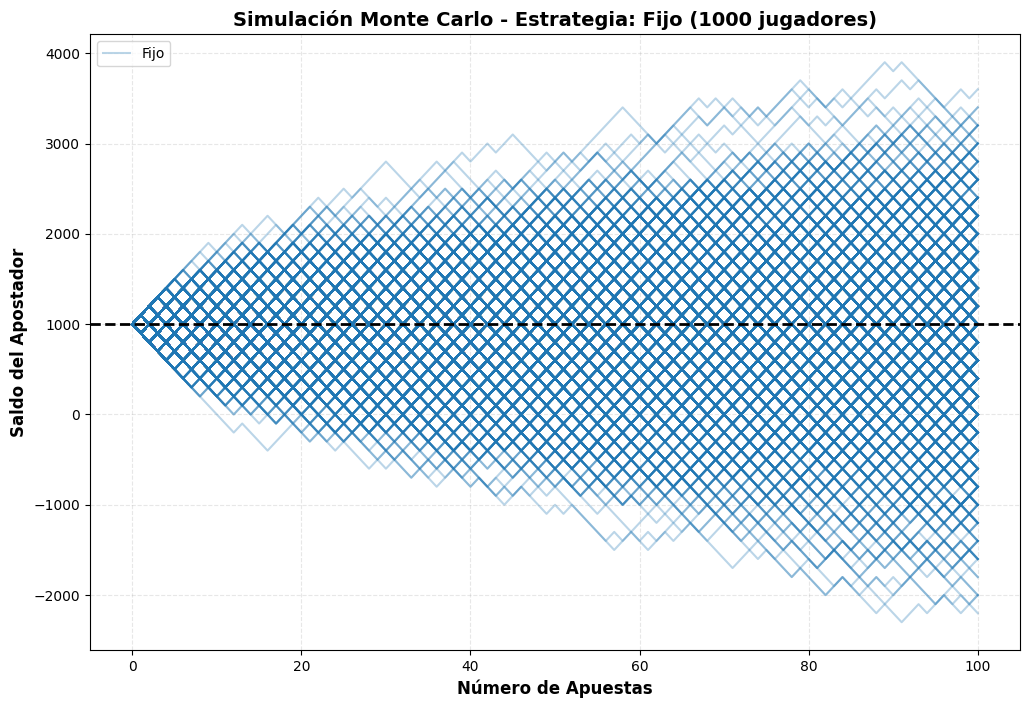


 **Resumen de Resultados** 
 Resultados por encima del capital inicial (385 simulaciones): 38.5%
 Resultados por debajo del capital inicial (535 simulaciones): 53.5%
 Resultados iguales al capital inicial      (80 simulaciones): 8.0%


In [16]:
# Función para simular una tirada de dados con 49% de probabilidad de ganar
def rollDice():
    return np.random.rand() < 0.49  # 49% de probabilidad de ganar

# Ajuste de colores y mejora del gráfico
strategy_colors = {
    "Fijo": "#1f77b4",        # Azul Suave
    "Martingala": "#ff7f0e",  # Naranja
    "Paroli": "#d62728"       # Rojo
}

# Función para simular una estrategia específica de apuestas con Monte Carlo
def monte_carlo_strategy(funds, wager_amount, wager_count, num_simulations, strategy):
    """
    Simula una estrategia de apuestas específica en un entorno Monte Carlo sin límite inferior.

    Estrategias disponibles:
    - **Fijo**: Apuesta siempre la misma cantidad.
    - **Martingala**: Duplica la apuesta tras una pérdida.
    - **Paroli**: Duplica la apuesta tras una victoria.

    Parámetros:
    - funds: Capital inicial del apostador.
    - wager_amount: Monto base de cada apuesta.
    - wager_count: Número total de apuestas.
    - num_simulations: Número de jugadores (simulaciones).
    - strategy: Tipo de estrategia a simular.

    Retorna:
    - Un gráfico con las simulaciones de la estrategia seleccionada.
    - Un resumen de los resultados de las simulaciones.
    """
    if strategy not in strategy_colors:
        print(f" Estrategia '{strategy}' no reconocida. Elige entre: {list(strategy_colors.keys())}")
        return

    plt.figure(figsize=(12, 8))
    color = strategy_colors[strategy]
    max_value = 100000  # Límite superior para evitar valores fuera de control

    valores_finales = []  # Lista para almacenar el saldo final de cada simulación

    for _ in range(num_simulations):
        value = funds  # Fondos actuales
        balance_history = [value]
        wager = wager_amount  # Apuesta inicial

        for _ in range(wager_count):
            if rollDice():  # Si gana
                value += wager
                if strategy == "Martingala":
                    wager = wager_amount  # Resetea la apuesta a la base
                elif strategy == "Paroli":
                    wager = min(wager * 2, max_value)  # Duplica apuesta tras ganar
            else:  # Si pierde
                value -= wager
                if strategy == "Martingala":
                    wager = min(wager * 2, max_value)  # Duplica la apuesta con tope
                elif strategy == "Paroli":
                    wager = wager_amount  # Resetea la apuesta a la base

            # Limitar el valor máximo pero permitir valores negativos
            value = min(value, max_value)
            balance_history.append(value)

        valores_finales.append(value)  # Guardar saldo final
        plt.plot(range(len(balance_history)), balance_history, alpha=0.3, color=color)

    # Configuración del gráfico
    plt.xlabel("Número de Apuestas", fontsize=12, fontweight="bold")
    plt.ylabel("Saldo del Apostador", fontsize=12, fontweight="bold")
    plt.title(f"Simulación Monte Carlo - Estrategia: {strategy} ({num_simulations} jugadores)",
              fontsize=14, fontweight="bold")
    plt.axhline(y=funds, color="black", linestyle="--", linewidth=2, label="Capital Inicial")
    plt.legend([strategy], loc="upper left", fontsize=10, frameon=True)
    plt.grid(alpha=0.3, linestyle="--")
    plt.show()

    # Convertir valores finales a numpy array para análisis
    valores_finales = np.array(valores_finales)

    # Filtrar los resultados en tres categorías
    encima_inicial = valores_finales[valores_finales > funds]
    debajo_inicial = valores_finales[valores_finales < funds]
    identicos = valores_finales[valores_finales == funds]

    # Imprimir estadísticas
    print("\n **Resumen de Resultados** ")
    print(f" Resultados por encima del capital inicial ({len(encima_inicial)} simulaciones): {round((len(encima_inicial) / num_simulations) * 100, 2)}%")
    print(f" Resultados por debajo del capital inicial ({len(debajo_inicial)} simulaciones): {round((len(debajo_inicial) / num_simulations) * 100, 2)}%")
    print(f" Resultados iguales al capital inicial      ({len(identicos)} simulaciones): {round((len(identicos) / num_simulations) * 100, 2)}%")

# Parámetros de la simulación
initial_funds = 1000  # Capital inicial
wager_amount = 100  # Apuesta base
wager_count = 100  # Número de apuestas
num_simulations = 1000  # Número de jugadores (simulaciones)

# El usuario elige qué estrategia probar
strategy_choice = "Fijo"  # Cambia esto a "Fijo", "Paroli", "Martingala"

# Ejecutar simulación Monte Carlo con la estrategia seleccionada
monte_carlo_strategy(initial_funds, wager_amount, wager_count, num_simulations, strategy_choice)


Por eso los jugadores pierden. Por lo general, las probabilidades no están muy en contra de ellos, solo un poco. Los casinos simplemente entienden la psicología básica, sabiendo que *ganar* es extremadamente adictivo. Los casinos están diseñados para mantenerte dentro y seguir jugando.

A corto plazo, la mayoría de los jugadores realmente no se dan cuenta de que es seguro que perderán, las victorias y las derrotas parecen bastante parecidas. Algunas personas, casi la mitad, están estadísticamente seguras de que realmente se beneficiarán. El problema es que esto es adictivo y quieren seguir haciéndolo. Terminan continuando, y la mayoría termina devolviendo sus ganancias. Es simple matemática, pero la psicología humana es débil.

En este punto, los apostadores, con su mente de apostador, comienzan a imaginar varias estrategias para superar sus probabilidades.

Una de las prácticas más comunes aquí es duplicar las pérdidas. Entonces, si pierde, simplemente duplique su apuesta hasta que gane. Una vez que hayas ganado, vuelves a tu punto de partida. Solo necesitamos esa ventaja del 1%, debería ser muy fácil, ¿verdad?



---
---

# 2.14 Simulación Monte Carlo Transitoria para Planificación Financiera Basada en Datos Reales

## Contexto
Esta simulación evalúa cómo crecería el ahorro de una persona durante **10 años** bajo condiciones **realistas y basadas en datos históricos**. 

En lugar de asumir tasas fijas de crecimiento, utilizaremos **Monte Carlo transitorio** para modelar el ahorro mes a mes, incorporando:
- **Incrementos salariales moderados (3% - 4% anual)**
- **Inflación controlada en gastos (2% - 3% anual)**
- **Rendimientos de inversión basados en datos del S&P 500 (2012-2020)**
- **Eventos imprevistos de bajo impacto pero realistas (crisis, devaluaciones, gastos inesperados)**

---

## ¿Por qué Monte Carlo Transitorio?
Esta simulación es **transitoria** porque modela la evolución del ahorro en el tiempo en función de:
1. **Datos históricos del mercado** en lugar de asumir tasas fijas.
2. **Efectos acumulativos de inflación y rendimiento** sobre el capital.
3. **Eventos impredecibles con baja probabilidad** pero impacto financiero significativo.

Al ejecutar **1,000 simulaciones**, generamos un abanico de escenarios posibles que nos permiten visualizar el **riesgo y la incertidumbre** en la acumulación de ahorro.

---

## ¿Cómo funciona el modelo?
- Se descargan **datos históricos del S&P 500 (2010-2020)** desde Yahoo Finance.
- Se calculan los **rendimientos mensuales reales del mercado**.
- Cada simulación modela **120 meses (10 años)** de ahorro, ajustando ingresos y gastos mes a mes.
- Se incluyen **factores económicos impredecibles**, como crisis económicas y devaluaciones.
- Se analiza la **probabilidad de alcanzar $1,000,000 MXN en ahorro acumulado**.
- Se visualiza la distribución final del ahorro acumulado.

---

## Resultados y Análisis
1. **Evolución dinámica del ahorro**
   - Cada simulación sigue una trayectoria única debido a la variabilidad de los rendimientos del mercado y eventos inesperados.
   - La **línea roja** representa el promedio de todas las simulaciones.

2. **Probabilidad de alcanzar la meta**
   - Se estima cuántas simulaciones superan **$1,000,000 MXN** antes de los 10 años.
   - Si el porcentaje es bajo, podríamos evaluar estrategias de inversión más agresivas.

3. **Impacto de eventos imprevistos**
   - Se incluyen eventos realistas pero de bajo impacto:
     - **Crisis económica (1% de probabilidad mensual)**: Reducción del ingreso entre 10% y 20%.
     - **Devaluaciones (0.5% de probabilidad mensual)**: Aumento de gastos entre 3% y 8%.
     - **Gastos inesperados (3% de probabilidad mensual)**: Costos adicionales de 2,000 a $7,000 MXN.

4. **Distribución de resultados**
   - Se grafica un **histograma del ahorro final** para visualizar cómo varían los escenarios.

5. **Escenario realista para planificación financiera**
   - Este modelo puede ser usado para **planificar el retiro, ahorro para inversión o estabilidad financiera**.
   - Es una herramienta clave para **evaluar riesgo y tomar decisiones informadas**.

---

## Próximos pasos
Si deseas:
- **Calcular la probabilidad exacta de alcanzar $1,000,000 MXN**.
- **Ajustar parámetros a perfiles financieros más agresivos o conservadores**.

YF.download() has changed argument auto_adjust default to True
Probabilidad de alcanzar $1,000,000 MXN en 10 años: 36.20%


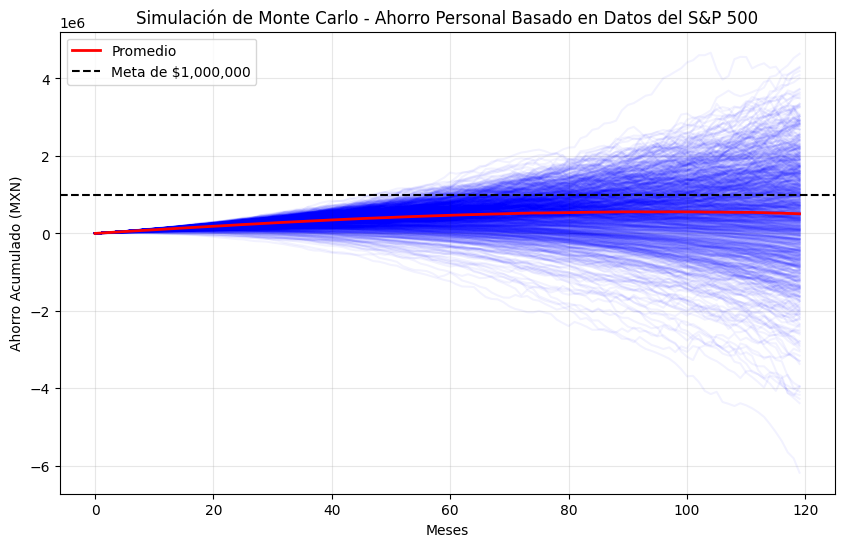

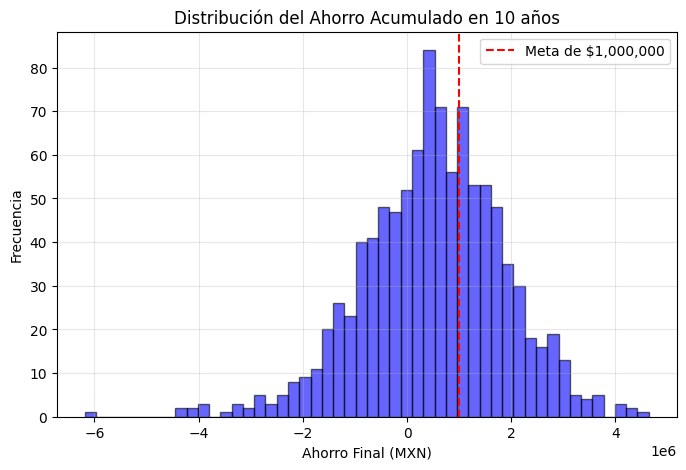

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#install if needed
#pip install yfinance
import yfinance as yf

# Descargar datos históricos del S&P 500 desde Yahoo Finanzas
sp500 = yf.download('^GSPC', start='2010-01-01', end='2020-12-31', progress=False)

# Ajustar nombres de columnas si hay múltiples niveles
if isinstance(sp500.columns, pd.MultiIndex):
    sp500.columns = sp500.columns.get_level_values(1)

# Asignar nombres correctos a las columnas
sp500.columns = ['Open', 'Close', 'High', 'Low', 'Volume']

# Resamplear para obtener valores mensuales
sp500_monthly = sp500['Close'].resample('ME').last()

# Asegurar continuidad en todas las fechas
sp500_monthly = sp500_monthly.reindex(pd.date_range(start="2010-01-31", end="2020-12-31", freq="ME"))

# Rellenar valores faltantes con interpolación
sp500_monthly = sp500_monthly.interpolate()

# Calcular rendimientos mensuales
sp500_monthly_returns = sp500_monthly.pct_change()

# DataFrame con valores corregidos
sp500_final = pd.DataFrame({'Close': sp500_monthly, 'Monthly Return': sp500_monthly_returns})

# Parámetros de simulación
meses = 120  # 10 años
num_simulaciones = 1000  # Número de simulaciones
ingreso_mensual_base = 30000  # Ingreso mensual en pesos
gasto_mensual_base = 20000  # Gasto mensual en pesos

# Factores económicos
crisis_probabilidad = 0.01
impacto_crisis = (-0.1, -0.2)
devaluacion_probabilidad = 0.005
impacto_devaluacion = (0.03, 0.08)
gasto_emergente_probabilidad = 0.03
impacto_gasto_emergente = (2000, 7000)

# Matriz para almacenar resultados
ahorro_total = np.zeros((num_simulaciones, meses))

# Simulación Monte Carlo
for sim in range(num_simulaciones):
    ahorro = 0
    ingreso_mensual = ingreso_mensual_base
    gasto_mensual = gasto_mensual_base
    
    for mes in range(1, meses):
        if mes % 12 == 0:  
            ingreso_mensual *= (1 + np.random.uniform(0.03, 0.04))
            gasto_mensual *= (1 + np.random.uniform(0.02, 0.03))
        
        if np.random.rand() < crisis_probabilidad:
            ingreso_mensual *= (1 + np.random.uniform(*impacto_crisis))

        if np.random.rand() < devaluacion_probabilidad:
            gasto_mensual *= (1 + np.random.uniform(*impacto_devaluacion))

        if np.random.rand() < gasto_emergente_probabilidad:
            gasto_mensual += np.random.uniform(*impacto_gasto_emergente)

        ahorro_mensual = ingreso_mensual - gasto_mensual
        ahorro += ahorro_mensual

        rendimiento_mensual = np.random.choice(sp500_final['Monthly Return'].dropna().values)
        ahorro *= (1 + rendimiento_mensual)
        
        ahorro_total[sim, mes] = ahorro

# Calcular probabilidad de alcanzar $1,000,000 MXN
probabilidad_exito = np.mean(ahorro_total[:, -1] >= 1000000) * 100
print(f"Probabilidad de alcanzar $1,000,000 MXN en 10 años: {probabilidad_exito:.2f}%")

# Graficar todas las simulaciones de ahorro
plt.figure(figsize=(10, 6))
for i in range(num_simulaciones):
    plt.plot(range(meses), ahorro_total[i, :], color='blue', alpha=0.05)
plt.plot(range(meses), np.mean(ahorro_total, axis=0), color='red', linewidth=2, label='Promedio')
plt.axhline(y=1000000, color='black', linestyle='--', label='Meta de $1,000,000')
plt.xlabel('Meses')
plt.ylabel('Ahorro Acumulado (MXN)')
plt.title('Simulación de Monte Carlo - Ahorro Personal Basado en Datos del S&P 500')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Graficar distribución final del ahorro
plt.figure(figsize=(8, 5))
plt.hist(ahorro_total[:, -1], bins=50, color='blue', alpha=0.6, edgecolor='black')
plt.axvline(x=1000000, color='red', linestyle='--', label='Meta de $1,000,000')
plt.xlabel("Ahorro Final (MXN)")
plt.ylabel("Frecuencia")
plt.title("Distribución del Ahorro Acumulado en 10 años")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

---
---
---
<h1><center>Referencias y links de interés</center></h1>

---

* [Ley de los Grandes Números](https://es.wikipedia.org/wiki/Ley_de_los_grandes_n%C3%BAmeros)
* Información extra de [Métodos Monte Carlo](https://www.statisticshowto.com/monte-carlo-simulation/)
* Información sobre algoritmo [Mersenne Twister](https://www.sciencedirect.com/topics/computer-science/mersenne-twister)
* M. Matsumoto and T. Nishimura (1998) - [Mersenne twister: a 623-dimensionally equidistributed uniform pseudo-random number generator](https://dl.acm.org/doi/10.1145/272991.272995)

* [Más de MCMC](http://people.duke.edu/~ccc14/sta-663/MCMC.html)

**Tutoriales MCMC**
* [Tutorial MCMC - Inferencia Bayesiana](https://nbviewer.org/github/yoyolin/mcmc-tutorial/blob/master/MCMC_for_Bayesian_Inference.ipynb)

* [Otro ejemplo MCMC](https://github.com/prappleizer/prappleizer.github.io/blob/master/Tutorials/MCMC/MCMC_Tutorial_Solution.ipynb)

--------

* La [falacia del jugador: qué es y cómo nos afecta](https://psicologiaymente.com/psicologia/falacia-del-jugador)
* [Funciones en python](https://docs.python.org/3/tutorial/classes.html)

* [Función lambda](https://www.w3schools.com/python/python_lambda.asp)
* [likelihood_computer](https://machinelearningmastery.com/what-is-maximum-likelihood-estimation-in-machine-learning/) y [normal distribution](https://www.onlinemathlearning.com/normal-distribution.html)
